In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [32]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
base_dir = '../input/breast-histopathology-images'
file=os.listdir('../input/breast-histopathology-images')
print(len(file))

280


In [13]:
f1 = os.listdir('../input/breast-histopathology-images/IDC_regular_ps50_idx5/13689')
f1

['0', '1']

In [15]:
folder_0 = os.listdir('../input/breast-histopathology-images/IDC_regular_ps50_idx5/13689/0')
folder_1 = os.listdir('../input/breast-histopathology-images/IDC_regular_ps50_idx5/13689/1')

In [28]:
data =  '../input/breast-histopathology-images/IDC_regular_ps50_idx5'

patient_ids = os.listdir(train)

In [23]:
class_0_total = 0
class_1_total = 0

In [26]:
for i in patient_ids:
    class_0_files = os.listdir(data + i + '/0')
    class_1_files = os.listdir(data + i + '/1')

    class_0_total += len(class_0_files)
    class_1_total += len(class_1_files) 

total_images = class_0_total + class_1_total
    
print(f'Number of patches in Class 0: {class_0_total}')
print(f'Number of patches in Class 1: {class_1_total}')
print(f'Total number of patches: {total_images}')

Number of patches in Class 0: 198738
Number of patches in Class 1: 78786
Total number of patches: 277524


In [29]:
from os import listdir

In [30]:
columns = ["patient_id",'x','y',"target","path"]
data_rows = []
i = 0
iss = 0
isss = 0

# note that we loop through the classes after looping through the 
# patient ids so that we avoid splitting our data into [all class 0 then all class 1]
for patient_id in patient_ids:
    for c in [0,1]:
        class_path = train + patient_id + '/' + str(c) + '/'
        imgs = listdir(class_path)
        
        # Extracting Image Paths
        img_paths = [class_path + img + '/' for img in imgs]
        
        # Extracting Image Coordinates
        img_coords = [img.split('_',4)[2:4] for img in imgs]
        x_coords = [int(coords[0][1:]) for coords in img_coords]
        y_coords = [int(coords[1][1:]) for coords in img_coords]

        for (path,x,y) in zip(img_paths,x_coords,y_coords):
            values = [patient_id,x,y,c,path]
            data_rows.append({k:v for (k,v) in zip(columns,values)})

# We create a new dataframe using the list of dicts that we generated above
data = pd.DataFrame(data_rows)
print(data.shape)
data



(277524, 5)


,patient_id,x,y,target,path
0,10295,1351,1101,0,../input/breast-histopathology-images/IDC_regu...
1,10295,1501,501,0,../input/breast-histopathology-images/IDC_regu...
2,10295,1501,1101,0,../input/breast-histopathology-images/IDC_regu...
3,10295,451,901,0,../input/breast-histopathology-images/IDC_regu...
4,10295,801,451,0,../input/breast-histopathology-images/IDC_regu...
...,...,...,...,...,...
277519,12873,1601,901,1,../input/breast-histopathology-images/IDC_regu...
277520,12873,1001,801,1,../input/breast-histopathology-images/IDC_regu...
277521,12873,1001,851,1,../input/breast-histopathology-images/IDC_regu...
277522,12873,1401,451,1,../input/breast-histopathology-images/IDC_regu...


<AxesSubplot:>

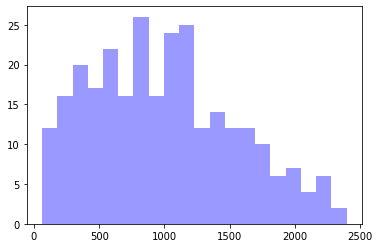

In [35]:
sns.distplot(data.groupby("patient_id").size(), color="blue", kde=False, bins=20)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


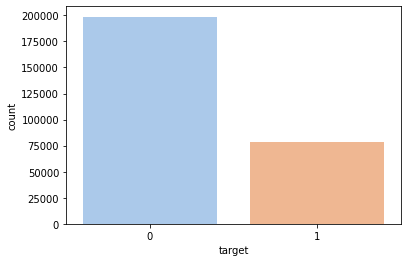

In [37]:
sns.countplot(data.target, palette='pastel');

In [48]:
n_rows=3
n_cols=5

positive_tissue = np.random.choice(data[data.target==1].index.values, size=100, replace=False)
negative_tissue = np.random.choice(data[data.target==0].index.values, size=100, replace=False)

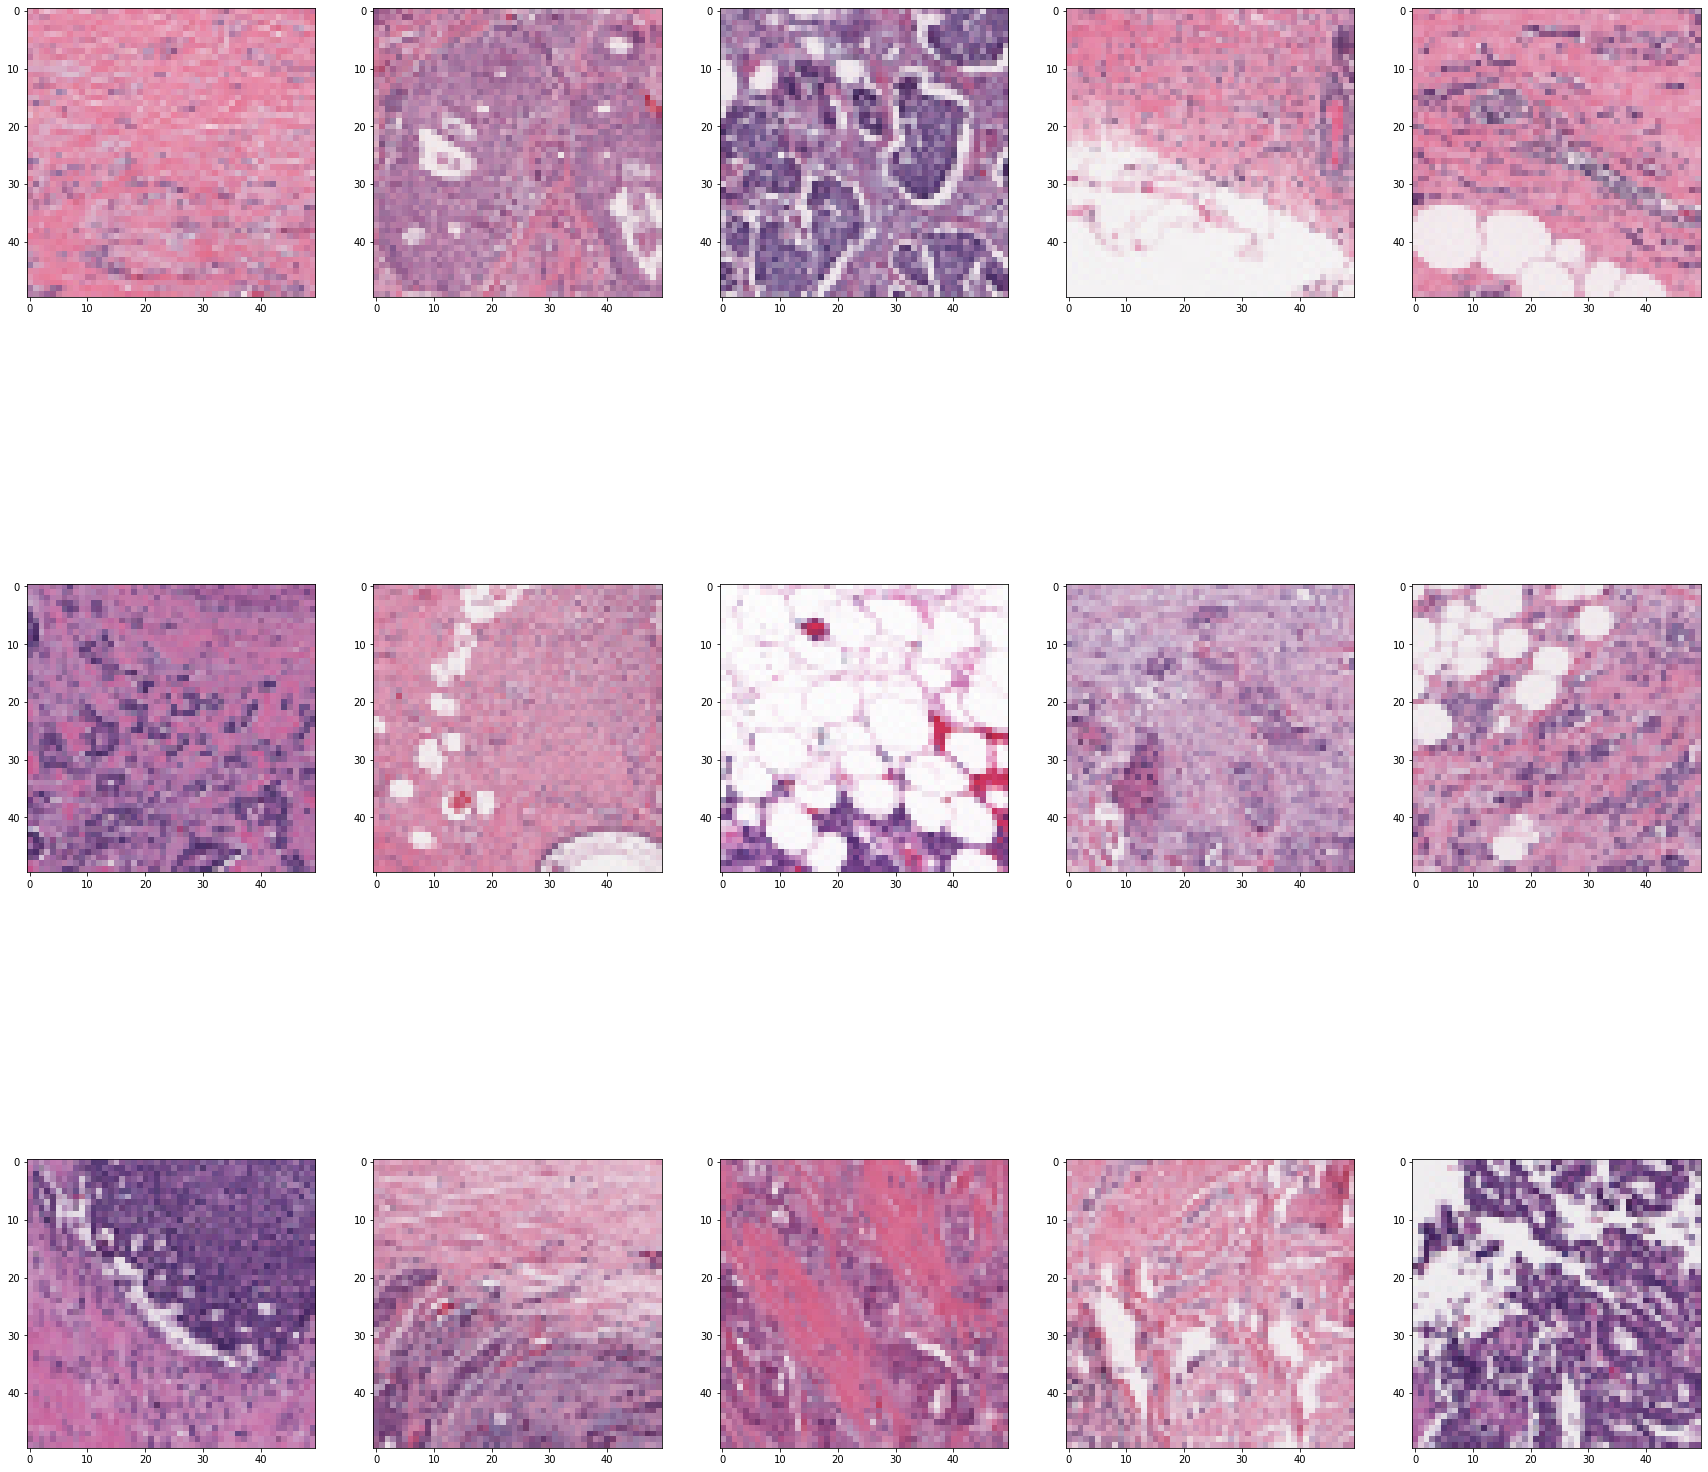

In [50]:
from skimage import io
fig,ax = plt.subplots(n_rows,n_cols,figsize = (30,30))

for row in range(n_rows):
    for col in range(n_cols):
        # below is a counter to cycle through the image indexes
        idx = positive_tissue[col + n_cols*row]
        img = io.imread(data.loc[idx, "path"])
        ax[row,col].imshow(img[:,:,:])
        ax[row,col].grid(False)

In [54]:
n_rows = 5
n_cols = 3
n_imgs = n_rows*n_cols

def get_patient_df(patient_id):
    return data.loc[data['patient_id']== patient_id,:]

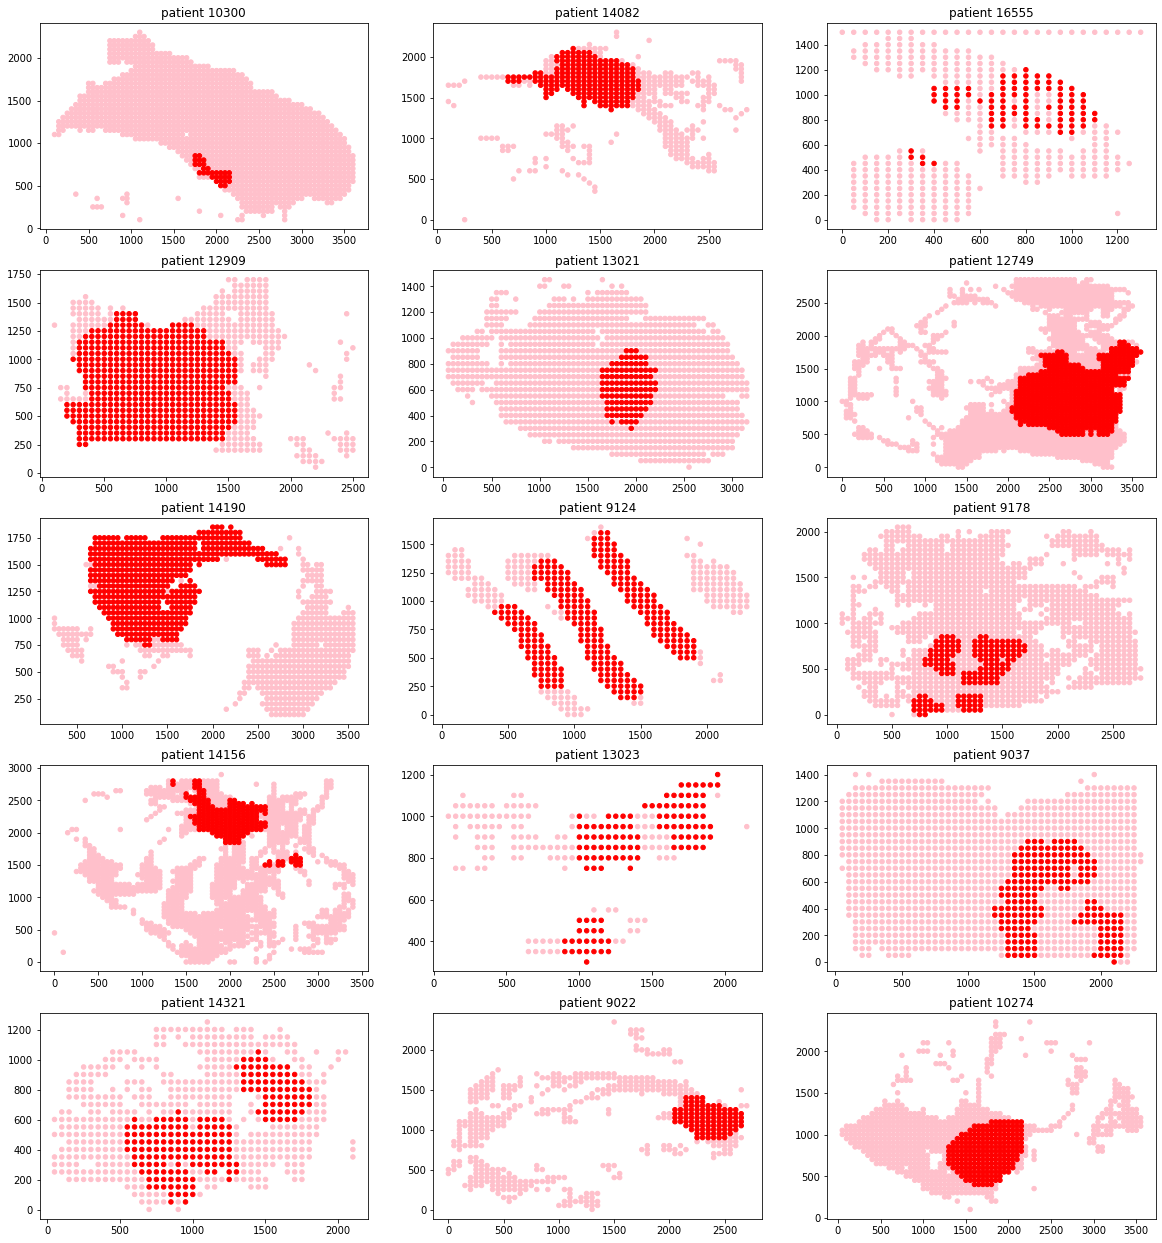

In [56]:
from matplotlib.colors import ListedColormap

colors = ['pink', 'red']

fig, ax = plt.subplots(n_rows,n_cols,figsize=(20, 22))

patient_ids = np.random.choice( data.patient_id.unique(), size=n_imgs, replace=False)

for row in range(n_rows):
    for col in range(n_cols):
        patient_id = patient_ids[col + n_cols*row]
        patient_df = get_patient_df(patient_id)
        
        ax[row,col].scatter(patient_df.x.values, \
                            patient_df.y.values, \
                            c=patient_df.target.values,\
                            cmap=ListedColormap(colors), s=20)
        ax[row,col].set_title("patient " + patient_id)

In [58]:
from sklearn.model_selection import train_test_split

In [64]:
shuffled_data = data.set_index('patient_id')
X = shuffled_data.loc[:, shuffled_data.columns != 'target']
y = shuffled_data['target']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, shuffle = False)

In [65]:
X_train

,x,y,path
patient_id,,,
10295,1351,1101,../input/breast-histopathology-images/IDC_regu...
10295,1501,501,../input/breast-histopathology-images/IDC_regu...
10295,1501,1101,../input/breast-histopathology-images/IDC_regu...
10295,451,901,../input/breast-histopathology-images/IDC_regu...
10295,801,451,../input/breast-histopathology-images/IDC_regu...
...,...,...,...
9029,1851,651,../input/breast-histopathology-images/IDC_regu...
9029,1301,1001,../input/breast-histopathology-images/IDC_regu...
9029,1651,1001,../input/breast-histopathology-images/IDC_regu...
